Simple geometry nodes setup like this  

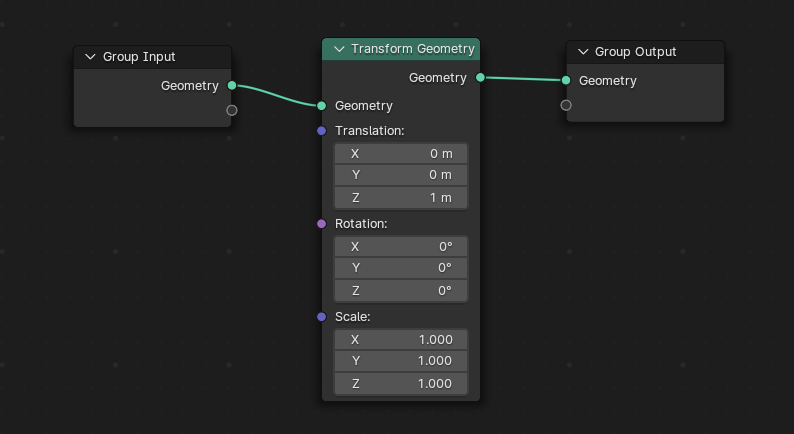

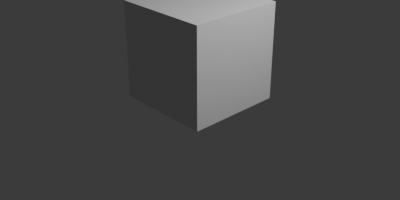

In [1]:
import bpy
from IPython.display import display, Image

# Deselect and select the existing default cube in the scene
bpy.ops.object.select_all(action="DESELECT")
cube = bpy.data.objects.get("Cube")
bpy.context.view_layer.objects.active = cube
cube.select_set(True)

# Create a red material using Principled BSDF
material = bpy.data.materials.new(name="RedMaterial")
material.use_nodes = True
bsdf = material.node_tree.nodes.get("Principled BSDF")
bsdf.inputs['Base Color'].default_value = (1, 0, 0, 1)  # Red, fully opaque

cube.data.materials.append(material)

# Setup geometry nodes
geo_nodes = cube.modifiers.new(name="GeometryNodes", type="NODES")
node_group = bpy.data.node_groups.new("GeometryNodes", "GeometryNodeTree")
geo_nodes.node_group = node_group

# Create input/output and transformation nodes
inNode = node_group.nodes.new("NodeGroupInput")
outNode = node_group.nodes.new("NodeGroupOutput")
transformNode = node_group.nodes.new("GeometryNodeTransform")

# Define geometry input/output sockets
node_group.interface.new_socket(name="Geometry", in_out="INPUT", socket_type="NodeSocketGeometry")
node_group.interface.new_socket(name="Geometry", in_out="OUTPUT", socket_type="NodeSocketGeometry")

# Link the nodes together
node_group.links.new(inNode.outputs["Geometry"], transformNode.inputs["Geometry"])
node_group.links.new(transformNode.outputs["Geometry"], outNode.inputs["Geometry"])

# Set node positions
inNode.location = [-3 * inNode.width, 0]
outNode.location = [3 * outNode.width, 0]
transformNode.location = [0, 0]
transformNode.inputs["Translation"].default_value = (0, 0, 1)

# Rendering settings
bpy.context.scene.render.engine = "BLENDER_EEVEE_NEXT"
bpy.context.scene.render.resolution_x = 400
bpy.context.scene.render.resolution_y = 200
bpy.ops.render.render()

# Save and display the rendered image
bpy.data.images["Render Result"].save_render(filepath="test.png")
display(Image(filename="test.png"))